In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create a random training data again
Nclass = 500
D = 2 #dimensionality of input
M = 3 #hidden layer size
K = 3 #number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

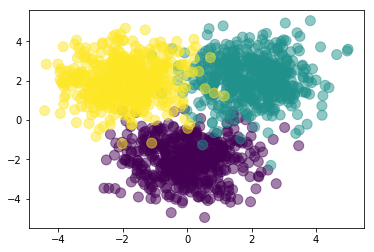

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

In [7]:
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))

for i in range(N):
    T[i, Y[i]] = 1
    
def init_wgts(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_wgts([D, M])
b1 = init_wgts([M])
W2 = init_wgts([M, K])
b2 = init_wgts([K])

py_x = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, T))

train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict = tf.argmax(py_x, 1)

sess = tf.Session()
inti = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    sess.run(train, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict, feed_dict= {tfX: X, tfY: T})
    if i % 10 == 0:
        print(np.mean(Y == pred))


ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)